In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
Btc = pd.read_csv("BTC-USDDD.csv", index_col = 'Date', parse_dates = True)

In [19]:
Btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-01,805.940002,829.929993,770.969971,815.940002,815.940002,8663855
2014-01-02,815.940002,886.210022,810.469971,856.909973,856.909973,10826907
2014-01-03,856.909973,888.229980,839.440002,884.260010,884.260010,8409629
2014-01-04,884.260010,932.159973,848.320007,924.690002,924.690002,12784626
2014-01-05,924.690002,1029.859985,911.359985,1014.739990,1014.739990,20789364


In [20]:
Btc.shape

(1461, 6)

In [23]:
Btc.index= pd.to_datetime(Btc.index)
print(Btc.index.dtype)
print(Btc.head())

datetime64[ns]
                  Open         High         Low        Close    Adj Close  \
Date                                                                        
2014-01-01  805.940002   829.929993  770.969971   815.940002   815.940002   
2014-01-02  815.940002   886.210022  810.469971   856.909973   856.909973   
2014-01-03  856.909973   888.229980  839.440002   884.260010   884.260010   
2014-01-04  884.260010   932.159973  848.320007   924.690002   924.690002   
2014-01-05  924.690002  1029.859985  911.359985  1014.739990  1014.739990   

              Volume  
Date                  
2014-01-01   8663855  
2014-01-02  10826907  
2014-01-03   8409629  
2014-01-04  12784626  
2014-01-05  20789364  


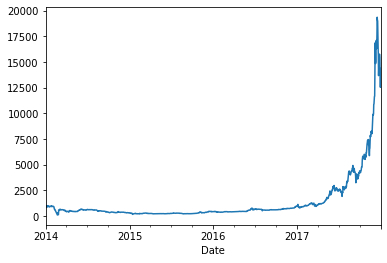

6.257128592448721 1.0


In [24]:
#Identification
from statsmodels.tsa.stattools import adfuller
Btc['Close'].plot()
plt.show()
result= adfuller(Btc['Close'])
print(result[0], result[1])

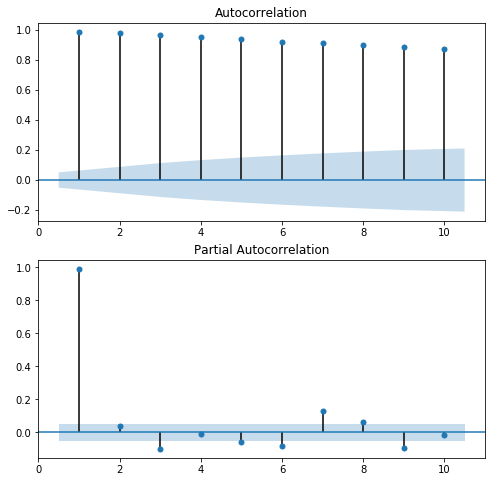

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (8,8))
plot_acf(Btc['Close'], lags= 10, zero= False, ax = ax1)
plot_pacf(Btc['Close'], lags = 10, zero = False, ax = ax2)
plt.show()

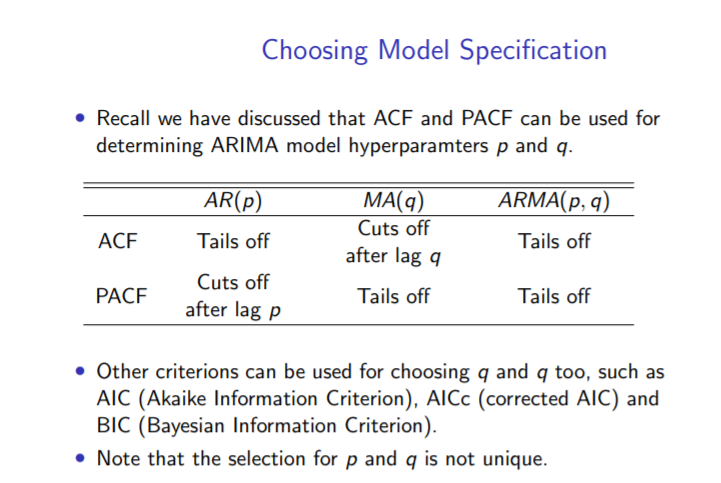

In [27]:
#Estimation
from statsmodels.tsa.statespace.sarimax import SARIMAX
order_aic_bic = []
for p in range(7):
    for q in range(7): 
            model = SARIMAX(Btc['Close'], order = (p,0,q), trend = 'c', freq = 'D')
            results= model.fit()
            order_aic_bic.append((p,q,results.aic,results.bic))

            
order_df = pd.DataFrame(order_aic_bic, columns = ['p','q','aic','bic'])
print(order_df.sort_values('aic'))
print(order_df.sort_values('bic'))

C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum

    p  q           aic           bic
40  5  5  19255.891243  19319.333760
47  6  5  19259.922928  19328.652321
48  6  6  19262.979673  19336.995943
41  5  6  19272.493697  19341.223091
46  6  4  19286.201683  19349.644200
45  6  3  19322.121106  19380.276746
39  5  4  19324.658737  19382.814377
34  4  6  19329.337591  19392.780108
44  6  2  19329.791763  19382.660527
38  5  3  19334.916650  19387.785414
31  4  3  19337.137711  19384.719598
37  5  2  19337.280454  19384.862341
26  3  5  19338.222864  19391.091628
27  3  6  19340.925398  19399.081038
32  4  4  19344.002867  19396.871631
33  4  5  19344.847397  19403.003037
24  3  3  19360.864943  19403.159955
43  6  1  19362.506202  19410.088090
20  2  6  19362.983657  19415.852421
25  3  4  19372.202296  19419.784184
13  1  6  19376.382745  19423.964633
12  1  5  19378.132986  19420.427997
30  4  2  19396.020682  19438.315694
42  6  0  19406.451748  19448.746759
36  5  1  19411.391516  19453.686527
18  2  4  19414.586978  19456.881989
2

C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\A

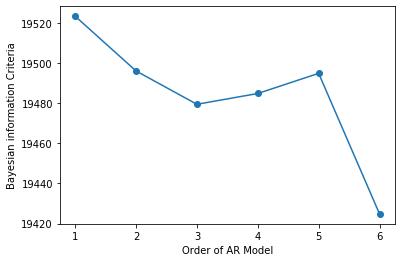

In [30]:
#Checking estimation graphically:
#Plotting BIC vs  AR
from statsmodels.tsa.arima_model import ARMA
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(Btc['Close'], order = (p,0))
    res =  mod.fit()
    BIC[p] = res.bic
    
plt.plot(range(1,7), BIC[1:7], marker = 'o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian information Criteria')
plt.show()

C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\

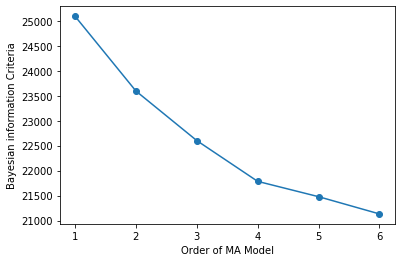

In [31]:
from statsmodels.tsa.arima_model import ARMA
BIC = np.zeros(7)
for q in range(7):
    mod = ARMA(Btc['Close'], order = (0,q))
    res =  mod.fit()
    BIC[q] = res.bic
    
plt.plot(range(1,7), BIC[1:7], marker = 'o')
plt.xlabel('Order of MA Model')
plt.ylabel('Bayesian information Criteria')
plt.show()

C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

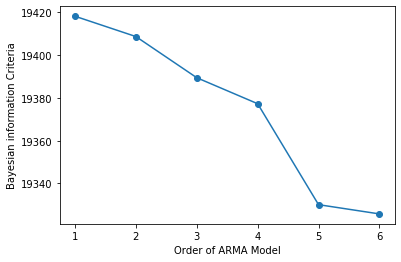

In [33]:
BIC = np.zeros(7)
for p in range(7):
    for q in range(7):
        mod = SARIMAX(Btc['Close'], order = (p,0,q))
        res =  mod.fit()
        BIC[p] = res.bic
    
plt.plot(range(1,7), BIC[1:7], marker = 'o')
plt.xlabel('Order of ARMA Model')
plt.ylabel('Bayesian information Criteria')
plt.show()

C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\A

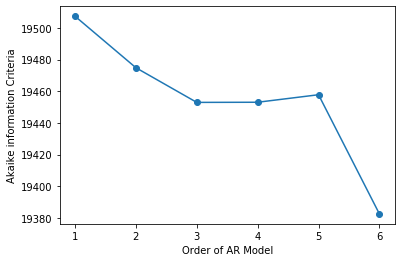

In [40]:
from statsmodels.tsa.arima_model import ARMA
AIC = np.zeros(7)
for p in range(7):
    mod = ARMA(Btc['Close'], order = (p,0))
    res = mod.fit()
    AIC[p] = res.aic
    
plt.plot(range(1,7), AIC[1:7], marker = 'o')
plt.xlabel('Order of AR Model')
plt.ylabel('Akaike information Criteria')
plt.show()

C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\

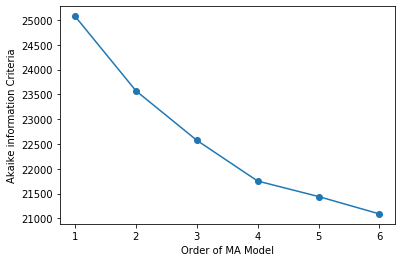

In [48]:
from statsmodels.tsa.arima_model import ARMA
AIC = np.zeros(7)
for q in range(7):
    mod = ARMA(Btc['Close'], order = (0,q))
    res = mod.fit()
    AIC[q] = res.aic
    
plt.plot(range(1,7), AIC[1:7], marker = 'o')
plt.xlabel('Order of MA Model')
plt.ylabel('Akaike information Criteria')
plt.show()

C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\azeem\

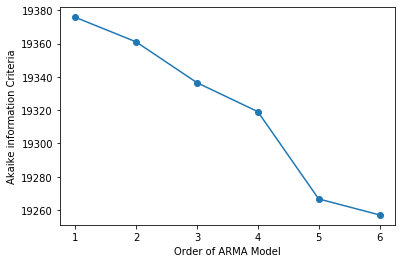

In [47]:
AIC = np.zeros(7)
for p in range(7):
    for q in range(7):
        mod = SARIMAX(Btc['Close'], order = (p,0,q))
        res = mod.fit()
        AIC[p] = res.aic
    
plt.plot(range(1,7), AIC[1:7], marker = 'o')
plt.xlabel('Order of ARMA Model')
plt.ylabel('Akaike information Criteria')
plt.show()